<a href="https://colab.research.google.com/github/AmnaShaheena/Machine-Learning-CSH4144-Practical/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data=pd.read_csv('/content/tips_dataset.csv')

In [21]:
data.tail()

,Total Bill,Sex,Smoker,Time,Day,Size,Tip
145,13.32,Male,No,Dinner,Wed,3,2.01
146,64.86,Male,Yes,Lunch,Fri,2,12.53
147,55.24,Female,Yes,Lunch,Fri,4,7.30
148,14.63,Male,No,Lunch,Tue,1,2.33
149,35.08,Female,No,Dinner,Thur,6,4.80


In [22]:
data.head()

,Total Bill,Sex,Smoker,Time,Day,Size,Tip
0,43.71,Male,No,Lunch,Fri,6,8.60
1,95.56,Male,No,Dinner,Tue,2,10.40
2,75.88,Male,No,Dinner,Tue,4,13.60
3,63.88,Female,No,Dinner,Tue,4,10.16
4,24.04,Female,Yes,Lunch,Sat,5,3.56


In [23]:
data['Sex']=data['Sex'].map({'Male':0,'Female':1})
data['Smoker']=data['Smoker'].map({'No':0,'Yes':1})
data['Time']=data['Time'].map({'Lunch':1,'Dinner':2})
data['Day']=data['Day'].map({'Mon':1,'Tue':2,'Wed':3,'Thur':4,'Fri':5,'Sat':6,'Sun':7})


In [24]:
data.head()

,Total Bill,Sex,Smoker,Time,Day,Size,Tip
0,43.71,0,0,1,5,6,8.60
1,95.56,0,0,2,2,2,10.40
2,75.88,0,0,2,2,4,13.60
3,63.88,1,0,2,2,4,10.16
4,24.04,1,1,1,6,5,3.56


In [25]:
X=data[['Total Bill','Smoker','Time','Day','Size']]
y=data['Tip']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print("Training samples:",X_train.shape[0])
print('Testing samples:',X_test.shape[0])

Training samples: 105
Testing samples: 45


In [27]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

print('Model training completed successfully')


Model training completed successfully


In [28]:
y_pred=model.predict(X_test)
print('prediction completed')

prediction completed


In [29]:
print("Inteercept:",model.intercept_)

Inteercept: -0.47400779188312114


In [30]:
print("Coefficient:",model.coef_)

Coefficient: [ 0.14042002 -0.11050163  0.26948048  0.01899147  0.13758371]


or


In [31]:
print("\nCoefficients (b₁ to b₅):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")



Coefficients (b₁ to b₅):
Total Bill: 0.1404200183640234
Smoker: -0.11050162702967334
Time: 0.26948047769249023
Day: 0.018991465232915387
Size: 0.1375837105191746


In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Evaluation Metrics:")
print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Model Evaluation Metrics:
R-squared: 0.8349334597014875
Mean Squared Error (MSE): 2.93350774394235
Mean Absolute Error (MAE): 1.2244596349859265
Root Mean Squared Error (RMSE): 1.71274859332663


In [33]:
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("First 5 actual vs predicted values:")
print(comparison.head())

First 5 actual vs predicted values:
   Actual  Predicted
0   12.77  12.370987
1    7.09   7.469161
2    9.54  13.440459
3    7.13   6.919563
4    9.11  11.612914


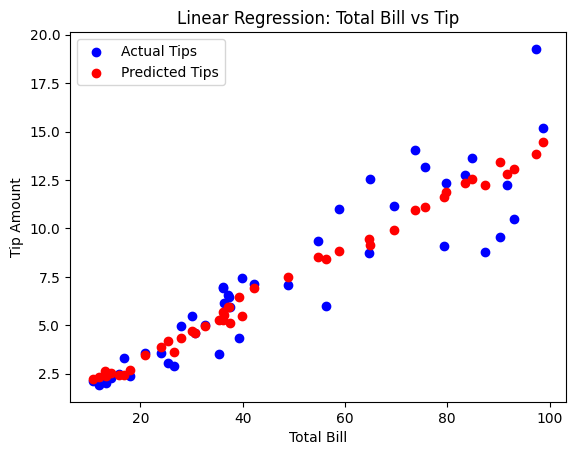

In [34]:

plt.scatter(X_test['Total Bill'], y_test, color='blue', label='Actual Tips')
plt.scatter(X_test['Total Bill'], y_pred, color='red', label='Predicted Tips')
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Linear Regression: Total Bill vs Tip")
plt.legend()
plt.show()


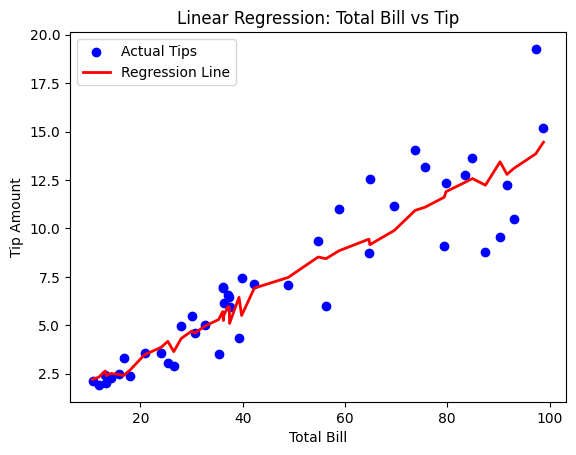

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Sort values by total_bill to get a smooth line
sorted_index = X_test['Total Bill'].argsort()
x_sorted = X_test['Total Bill'].iloc[sorted_index]
y_pred_sorted = y_pred[sorted_index]

# Plot the actual data
plt.scatter(X_test['Total Bill'], y_test, color='blue', label='Actual Tips')

# Plot the regression line
plt.plot(x_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Linear Regression: Total Bill vs Tip")
plt.legend()
plt.show()


Shape of data: (150, 5)
Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']
   sepal length (cm)  species
0                5.1        0
1                4.9        0
2                4.7        0
3                4.6        0
4                5.0        0
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.00

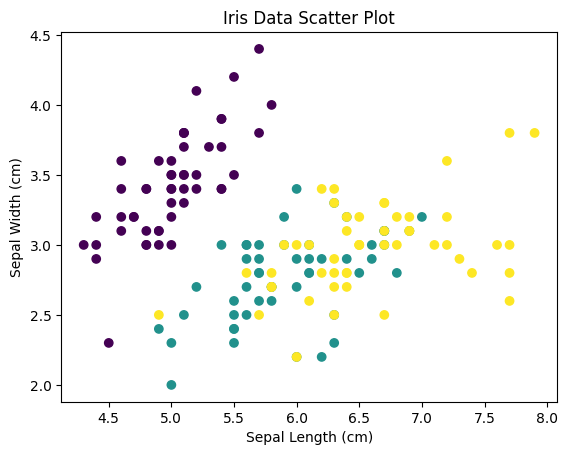

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



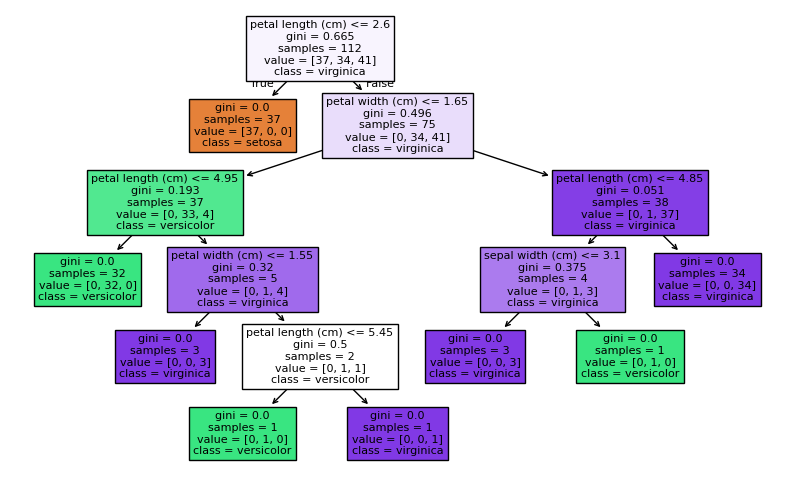

In [37]:
# a) Load Iris data
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# b) Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# c) Output shape
print("Shape of data:", df.shape)

# d) Output all column names
print("Columns:", df.columns.tolist())

# e) Output sepal length of all species
print(df[['sepal length (cm)', 'species']].head())

# f) Describe the data
print(df.describe())

# g) Statistical summary of Sepal Length
print(df['sepal length (cm)'].describe())

# h) Instances count of each class
print(df['species'].value_counts())

# i) Visualization – Scatter plot
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['species'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Data Scatter Plot')
plt.show()

# j) Split data (3:1 ratio)
X = df.iloc[:, :-1]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# k) Train Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# l) Make prediction
y_pred = model.predict(X_test)

# m) Accuracy measurement
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print(classification_report(y_test, y_pred))

# Visualize tree
plt.figure(figsize=(10,6))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


In [38]:
# a) Import libraries and load dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/salaries.csv")  # make sure Salaries.csv is in the same folder

# b) Output whole data
print(df.head())

# c) Identify X (independent) and y (dependent)
X = df.drop('salary_more_then_100k', axis=1)
y = df['salary_more_then_100k']

# d) Convert non-numerical columns into numeric
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

X['company'] = le_company.fit_transform(X['company'])
X['job'] = le_job.fit_transform(X['job'])
X['degree'] = le_degree.fit_transform(X['degree'])

# e) Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# f) Train Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# g) Prediction
y_pred = model.predict(X_test)

# h) Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# i) Hyperparameter tuning
model2 = DecisionTreeClassifier(random_state=0, max_depth=3, criterion='entropy')
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred2))

# j) Predict for new employee
sample = pd.DataFrame({'company': ['google'], 'job': ['business manager'], 'degree': ['bachelors']})
sample['company'] = le_company.transform(sample['company'])
sample['job'] = le_job.transform(sample['job'])
sample['degree'] = le_degree.transform(sample['degree'])

prediction = model2.predict(sample)
print("Predicted (1=True, 0=False):", prediction[0])


  company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0
Accuracy: 0.75
Tuned Model Accuracy: 0.75
Predicted (1=True, 0=False): 0
